In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import glob

In [2]:
path = '/gpfs/bbp.cscs.ch/project/proj53/CellDensitiesProject/Production/2024/Dataframes/Distinguishable_second_layer_prediction/'

In [3]:
filelist = glob.glob(path + '*.csv')
filelist.remove('/gpfs/bbp.cscs.ch/project/proj53/CellDensitiesProject/Production/2024/Dataframes/Distinguishable_second_layer_prediction/Features_SLD_0000560.vsi-20x_01.csv')

In [53]:
df = pd.read_csv(filelist[0])
layers = np.unique(df.RF_prediction)

In [6]:
layer_distance_to_pia_min = defaultdict(list)
for file in filelist:
    df = pd.read_csv(file)
    layers = np.unique(df.RF_prediction)
    for layer in layers:
        layer_distance_filter = df[df['RF_prediction'] == layer]['Distance to annotation with Outside Pia µm'].to_numpy()
        # We compute the mean of the 5 min value
        min_value_indice = np.argsort(layer_distance_filter)[:5]
        min_value = layer_distance_filter[min_value_indice].mean()
        layer_distance_to_pia_min[layer].append(min_value)

In [10]:
nb_entry_per_layer = len(filelist)

In [11]:
distances = np.zeros((layers.size, nb_entry_per_layer), dtype=float)
for index, dis in enumerate(layer_distance_to_pia_min.values()):
    distances[index][:] = dis

In [15]:
mean = distances.mean(axis=1)
std = distances.std(axis=1)

ind = np.arange(layers.size)    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence

/tmp/ipykernel_17327/3778796752.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=plt.gca().set_yticklabels(['{:.1e}'.format(x) for x in current_values])


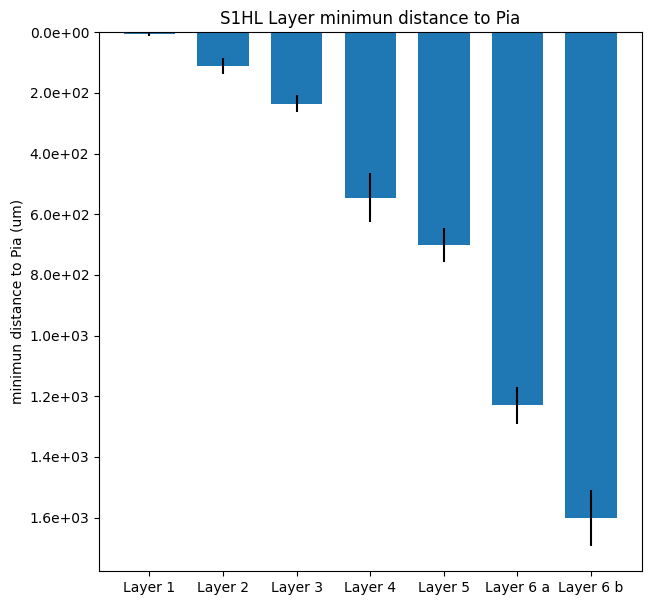

In [20]:
plt.figure(figsize=(7, 7))
p1 = plt.bar(ind, mean, width, yerr=std)
plt.gca().invert_yaxis()

plt.ylabel('minimun distance to Pia (um)')
plt.title('S1HL Layer minimun distance to Pia')
 
plt.xticks(ind, layers)   
current_values = plt.gca().get_yticks()
_=plt.gca().set_yticklabels(['{:.1e}'.format(x) for x in current_values])

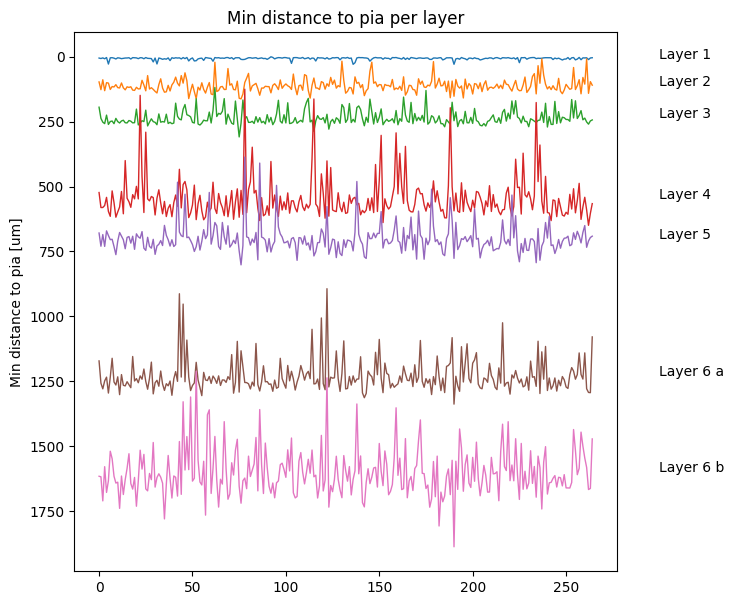

In [72]:



plt.figure(figsize=(7,7))
for layer in layers:
    distances = np.array(layer_distance_to_pia_min[layer])
    _=plt.plot (distances, linewidth=1)
    plt.text(300, distances.mean(), layer)
    plt.ylabel('Min distance to pia [um]')
    plt.title('Min distance to pia per layer')
    plt.gca().invert_yaxis()


In [101]:



plt.figure(figsize=(7,7))
for layer in layers:
    distances = np.array(layer_distance_to_pia_min[layer])
    x = np.arange(distances.size)
    mean = distances.mean()
    std = distances.std()
    _=plt.plot (distances.mean(), linewidth=10)
    #_=plt.fill_between(x, mean-std,mean+std,alpha=.3)
    plt.text(300, distances.mean(), layer + ' min')
    plt.ylabel('Min distance to pia [um]')
    plt.title('Min distance to pia per layer')
    plt.gca().invert_yaxis()


ValueError: Image size of 1479997x605 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 700x700 with 1 Axes>

In [99]:
distances.mean()

6.4740444528301895

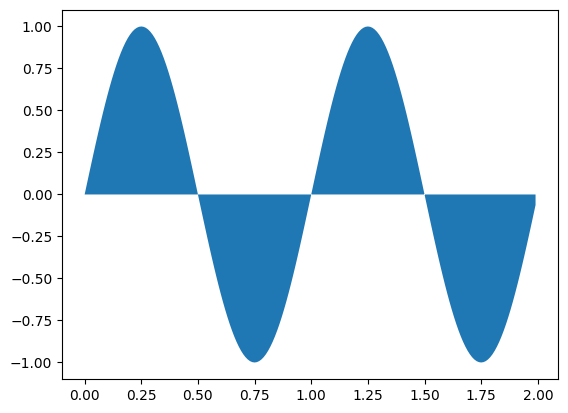

In [80]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 0.8 * np.sin(4 * np.pi * x)

plt.fill_between(x, y1)


fig.tight_layout()

In [81]:
x.shape

(200,)

In [84]:
y1

array([ 0.00000000e+00,  6.27905195e-02,  1.25333234e-01,  1.87381315e-01,
        2.48689887e-01,  3.09016994e-01,  3.68124553e-01,  4.25779292e-01,
        4.81753674e-01,  5.35826795e-01,  5.87785252e-01,  6.37423990e-01,
        6.84547106e-01,  7.28968627e-01,  7.70513243e-01,  8.09016994e-01,
        8.44327926e-01,  8.76306680e-01,  9.04827052e-01,  9.29776486e-01,
        9.51056516e-01,  9.68583161e-01,  9.82287251e-01,  9.92114701e-01,
        9.98026728e-01,  1.00000000e+00,  9.98026728e-01,  9.92114701e-01,
        9.82287251e-01,  9.68583161e-01,  9.51056516e-01,  9.29776486e-01,
        9.04827052e-01,  8.76306680e-01,  8.44327926e-01,  8.09016994e-01,
        7.70513243e-01,  7.28968627e-01,  6.84547106e-01,  6.37423990e-01,
        5.87785252e-01,  5.35826795e-01,  4.81753674e-01,  4.25779292e-01,
        3.68124553e-01,  3.09016994e-01,  2.48689887e-01,  1.87381315e-01,
        1.25333234e-01,  6.27905195e-02,  1.22464680e-16, -6.27905195e-02,
       -1.25333234e-01, -